<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PythonWorkFlow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

* Get data ready (turn into tensors)

* Build or pick a pretrained model

* Fit the model to the data and make a prediction

* Evaluate the model

* Improve through experimentation

* Save and reload your trined model

## Where to get help?


 * Follow along with the code 

 * Try it for yourself 

 * Press SHIFT + CMD + SPACE to read the docstring 

 * Search for it: use stack overflow

 * Try again 

 * Ask 

#PyTorch Workflow


Let's explore an example PyTorch end-to-end workflow.

Resources:

* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb

* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

* Ask Questions - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [5]:
what_weare_covering = {1:  "data (prepare and load)",
                      2:   "build model",
                      3:    "fitting the model to data (training)",
                      4:    "making predictions and evaluating a model (inferences)",
                      5:    "saving and loading a model",
                      6:    "putting it all together"
                       }
what_weare_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [6]:
import torch
from torch import nn #nn contains all of PyTorch's building bloacks for neural networks. 
#it is also a building blocks of graphs. Graphs is reffered to as computational gragh. 
#it is the job of machine learning engineers to combine trc.nn building blocks to build any deep learning frame work.

import matplotlib.pyplot as plt



In [7]:
#check PyTorch version
torch.__version__

'1.13.1+cu116'

##1. Data (preparing and loading)


Data can be almost anything...  in machine learning.

*  Excel spreadsheet
*  Images of any kind

*  Videos (Youtube has lots of data...)

*  Audio like songs or podcasts

*  DNA

*  Text


Machine learning is a game of two parts:
1. Get data into a numerical representations
2. Build a model to learn patterns in that numrical representation.

To showcase this, ley's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

We know these parameters but we want to build a model that will estimate these
**parameters** by building some examples.

In [8]:
# crete *known* parameters 
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #Adds extra dimension.
y  = weight * X + bias 

In [9]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [10]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Three datasets exist in data science: They are

1)  Training set:  Model learns patterns from training set

2)  Validation set:  Tune the model on the validation set

3)  Test set:  The test set examines the model's generalization.


Generalization is the ability for a machine learning model to perform well on data it hasn't seen before.


We want to build a machine learning model on some training data and we want to deploy on applications and production settings and then more data comes in than it has not seen before and it can make decision base on the new data because of the patterns it has learn in the training data.


Let's create a training and test set with our data

In [11]:
#Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [12]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Building a Function to Visualiza Our Data

How might we better visualize our data?

This is where we visualize our dataset.


In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))  #size of the figure 
  
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") #scatter plot of train_data vs train_labels
  
  #Plot test data in green 
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")  #scatter plot of test_data vs test_labels
  
  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") #scatter plot of test_data vs predictions
    
  # Show the legend
  plt.legend(prop={"size": 14});

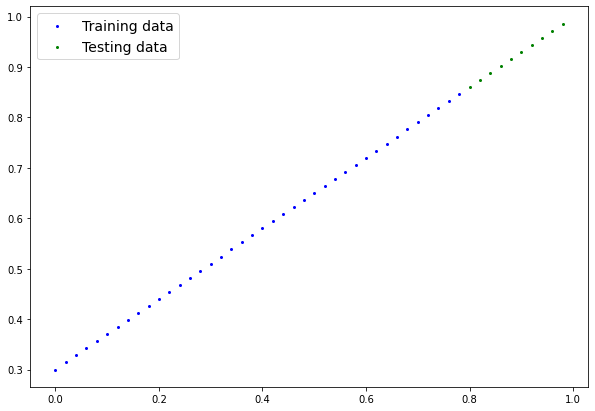

In [14]:
plot_predictions()

We will build a model to learn a pattern of the blue dot so that the x value of the green dot will be able to predict the appropriate y value.

## Creatng Our First PyTorch Model for Linear Regression

Because we will be building classes,the following resources will be useful.

https://realpython.com/python3-object-oriented-programming/


What our model does:
*  Start with random values (weight & bias)
*  Look at training data and adjust the random values to better represent (or get closer to) the ideal values ((The weight & bias values we used to create the data).


How does it do so?

Through two main algorithms:
1) Gradient descents: https://www.youtube.com/watch?v=IHZwWFHWa-w

2) Backpropagation: https://www.youtube.com/watch?v=tIeHLnjs5U8&t=6s

Gradient descent is why we have requires_grad = True. When running the code below, Python will keep track of the gradient of the weight and bias parameters and it will update the parameters through the combination of Gradient descent and back propagation.

In [17]:
from typing_extensions import Self
from torch import nn
# Create a linear regression model class.

class LinearRegressionModel(nn.Module):
  def __init__(self):
    #<- almost everything in PyTorch is from nn.modules. Your module should subclass this class
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias  = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
    # Forward methor to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      # "x" is the input data
      return self.weights * x + self.bias  # this is the linear regression formula
    #the forward module is the compuation that the module does. You need to define
    #the forward module if you want to subclass nn.Module. 
    #we pass the data to nn.Module and the forward method will perform the compuation


## PyTorch Modulde Building Essentials 

* torch.nn - contains all of the building blocks for computational grphs (a neural network can be considered a compuational grpah).

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer parameter from torch.nn will set these for us

* torch.nn.Module - The base calss for all neural network modules, if you subclass it, you should overwrite forward() method.

* torch.optim - Otimizers in PyTorch live here, and they will help with gradient descent.

*  def forward() - All nn.Module sublclasses require you to overwrite forward(),
this method defines what happens in the forward computation.

See some essential modules via PTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch Model

We can check our model paramters or what's inside our model using .parameters().

In [23]:
#Create a random seed. Because we will want to get the same value everytime 
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

We need to adjust our weights and bias as close as possible to the true values.